In [1]:
import torch
from torch import nn

In [ ]:
# 创建Tensor
# torch.tensor(data, dtype=None, device=None,requires_grad=False)
# 需要注意的是，torch.tensor 总是会复制 data, 如果想避免复制，可以使 torch.Tensor.detach()，如果是从 numpy 中获得数据，那么可以用torch.from_numpy(), from_numpy()是共享内存的
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

# torch.zeros(*sizes, out=None, ..)# 返回大小为sizes的零矩阵 

# torch.zeros_like(input, ..) # 返回与input相同size的零矩阵

# torch.ones(*sizes, out=None, ..) #f返回大小为sizes的单位矩阵

# torch.ones_like(input, ..) #返回与input相同size的单位矩阵

# torch.full(size, fill_value, …) #返回大小为sizes,单位值为fill_value的矩阵

# torch.full_like(input, fill_value, …) 返回与input相同size，单位值为fill_value的矩阵

# torch.arange(start=0, end, step=1, …) #返回从start到end, 单位步长为step的1-d tensor.

# torch.linspace(start, end, steps=100, …)  #返回从start到end, 间隔中的插值数目为steps的1-d tensor

# torch.logspace(start, end, steps=100, …) #返回1-d tensor ，从10^start到10^end的steps个对数间隔


# 根据矩阵的要求

# torch.eye(n, m=None, out=None,…) #返回2-D 的单位对角矩阵

# torch.empty(*sizes, out=None, …) #返回被未初始化的数值填充，大小为sizes的tensor

# torch.empty_like(input, …) # 返回与input相同size,并被未初始化的数值填充的tensor


# 随机生成 

# torch.normal(mean, std, out=None)

# torch.rand(*size, out=None, dtype=None, …) #返回[0,1]之间均匀分布的随机数值

# torch.rand_like(input, dtype=None, …) #返回与input相同size的tensor, 填充均匀分布的随机数值

# torch.randint(low=0, high, size,…) #返回均匀分布的[low,high]之间的整数随机值

# torch.randint_like(input, low=0, high, dtype=None, …) #

# torch.randn(*sizes, out=None, …) #返回大小为size,由均值为0，方差为1的正态分布的随机数值

# torch.randn_like(input, dtype=None, …)

# torch.randperm(n, out=None, dtype=torch.int64) # 返回0到n-1的数列的随机排列


In [ ]:
tensor = torch.rand(1,2)
# 张量基本信息
tensor.type()   # Data type
tensor.size()   # Shape of the tensor. It is a subclass of Python tuple
tensor.dim()    # Number of dimensions.

In [ ]:
# 数据类型转换
# Set default tensor type. Float in PyTorch is much faster than double.
torch.set_default_tensor_type(torch.FloatTensor)

# Type convertions.
tensor = tensor.cuda()
tensor = tensor.cpu()
tensor = tensor.float()
tensor = tensor.long()

In [ ]:
# torch.Tensor与np.ndarray转换
# torch.Tensor -> np.ndarray.
ndarray = tensor.cpu().numpy()

# np.ndarray -> torch.Tensor.
tensor = torch.from_numpy(ndarray).float()
tensor = torch.from_numpy(ndarray.copy()).float()  # If ndarray has negative stride


In [ ]:
# 从只包含一个元素的张量中提取值
value = tensor.item()

# 复制张量
tensor.clone()
tensor.detach()

In [ ]:
# 拼接张量
# torch.cat沿着给定的维度拼接，而torch.stack会新增一维
# 若参数是3个10x5的张量
# tensor = torch.cat(list_of_tensors, dim=0) # (30, 5)
# tensor = torch.stack(list_of_tensors, dim=0) # (3, 10, 5)

# 拆分张量
# torch.split(tensor, split_size_or_sections, dim=0)
# torch.chunk(tensor, chunks, dim=0)
# split的split_size_or_sections 表示每一个组块中的数据大小，chunks表示组块的数量
# >>> a = torch.Tensor([1,2,3])
# >>> torch.split(a,1)
# (tensor([1.]), tensor([2.]), tensor([3.]))
# >>> torch.chunk(a,1)
# (tensor([ 1., 2., 3.]),)

# indexing


# 转换
# torch.transpose(input, dim0, dim1, out=None) #返回dim0和dim1交换后的tensor
# torch.t(input, out=None) #专为2D矩阵的转置，是transpose的便捷函数
# torch.permute(*dims) # tensor转置，支持高维tensor转置

# torch.squeeze(input, dim, out=None)  #默认移除所有size为1的维度，当dim指定时，移除指定size为1的维度. 返回的tensor会和input共享存储空间，所以任何一个的改变都会影响另一个
# torch.unsqueeze(input, dim, out=None) #扩展input的size, 如 A x B 变为 1 x A x B 


# 展平一个连续范围的维度，输出类型为Tensor
# torch.flatten(input, start_dim=0, end_dim=-1) → Tensor

# reshape和view，都是转换tensor维度的操作，其中reshape可能会拷贝tensor，但view不会
# torch.reshape(input, shape) → Tensor
# view(*shape) → Tensor
# contiguous()，返回在内存中连续的tensor

In [ ]:
# 转换为one_hot
import torch.nn.functional as F
F.one_hot(torch.arange(0, 5) % 2, num_classes=5)

In [ ]:
# 非零/零元素
tensor = torch.tensor([0, 1, 0, 2, 3])
torch.nonzero(tensor) # 非零index
torch.nonzero(tensor == 0) # 零index
torch.nonzero(tensor).size(0) # 非零元素个数

In [ ]:
# expand
# 返回当前张量在某维扩展更大后的张量。扩展（expand）张量不会分配新的内存，只是在存在的张量上创建一个新的视图（view），一个大小（size）等于1的维度扩展到更大的尺寸。
x = torch.rand(2, 1, 1, 4)
x.expand(-1, 2, 3, -1).size()

In [ ]:
position_ids = torch.arange(20, dtype=torch.long)
print(position_ids.shape)
position_ids = position_ids.unsqueeze(0)
print(position_ids.shape)
position_ids = position_ids.expand(1, 20)
print(position_ids.shape)

In [ ]:
# 检查Pytorch版本
torch.__version__               # PyTorch version
torch.version.cuda              # Corresponding CUDA version
torch.backends.cudnn.version()  # Corresponding cuDNN version
torch.cuda.get_device_name(0)   # GPU type
# 判断是否有CUDA支持
torch.cuda.is_available()
# 设置为cuDNN benchmark模式
# Benchmark模式会提升计算速度，但是由于计算中有随机性，每次网络前馈结果略有差异。
# 程序启动时，为整个网络的每个卷积层搜索最适合它的卷积实现算法，进而实现网络的加速，适用于卷积网络参数固定时
torch.backends.cudnn.benchmark = True
# 使用默认卷积算法
torch.backends.cudnn.deterministic=True

In [ ]:
# torch.mm(matrix1, matrix2, out=None) # 只能进行矩阵乘法，维度分别是[n, m]和[m, p]，结果是[n, p]
# torch.bmm(batch1, batch2, out=None) # 两个batch矩阵的乘法，维度分别是[b, n, m]和[b, m, p]，结果是[b, n, p]
# torch.matmul(tensor1, tensor2, out=None) # 


In [ ]:
# Pytorch 1.2 版本后自带的Transformer类型
# transformer 类型
# transformer_model = nn.Transformer(nhead=8, num_encoder_layers=12)
# src = torch.rand((10, 32, 512))
# tgt = torch.rand((20, 32, 512))
# out = transformer_model(src, tgt)
#out.shape

encoder_layer = nn.TransformerEncoderLayer(d_model=768, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=4)
src = torch.rand((10, 32, 768))
outputs = transformer_encoder(src)
print(outputs.shape)

In [ ]:
# transformers中BertModel的基本使用方法
from transformers import BertModel

model = BertModel.from_pretrained('/home/dpet/code/model/uncased_L-12_H-768_A-12')

input_ids = torch.ones((32, 20), dtype=torch.long)
token_type_ids = torch.zeros((32, 20), dtype=torch.long)
outputs = model(input_ids=input_ids, token_type_ids=token_type_ids)
# outputs:
# torch.Size([32, 20, 768])
# torch.Size([32, 768])
for value in outputs:
    print(value.shape)
# pooler: outputs[0][:, 0].shape



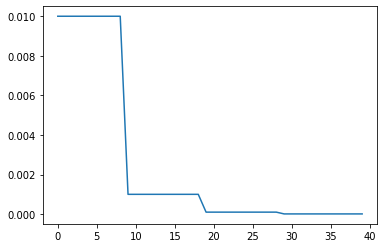

In [7]:
import numpy as np
from matplotlib import pyplot as plt

t = torch.tensor([0.0], requires_grad=True)
optim = torch.optim.SGD([t], lr=0.01)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[10, 20, 30])

lrs = []
for e in range(40):
    optim.step()
    lr_scheduler.step()
    lrs.append((e, optim.param_groups[0]['lr']))

lrs = np.array(lrs)
plt.plot(lrs[:, 0], lrs[:, 1])

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader, SequentialSampler

class TestDataset(Dataset):
    def __init__(self):
        self.data = [0, 1, 2, 3]

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return len(self.data)

dataset = TestDataset()

sampler = SequentialSampler(dataset)
loader = DataLoader(dataset=dataset,
                    batch_size=2,
                    sampler=sampler)

for data in loader:
    print(data)



0
tensor([0, 1])
tensor([2, 3])
